# REPLACEMENT STRATEGIES

In [2]:
# region --- PYTHON LIBRARY IMPORTS ---
import time
from math import *
from pathlib import Path
from random import randint
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors as colors
from scipy.optimize import curve_fit
%matplotlib inline
# --- Spatial geometry ---
from shapely.geometry import Point, Polygon, LineString

# --- SND IMPORTS ---
from ssnd.defaults import *
from ssnd.help_functions.helper_functions import *
#endregion 

module = "replacement_strategy"
read_module = "deterioration"

case_study = case_study
connectivity = "decentralised"

verbose = True  # set to TRUE for debugging
notify = True   # set to TRUE to track the progress

path = DATA_DIR/case_study/"output/shp"
output_path = DATA_DIR /case_study/"output"


In [3]:
blocks_dict=dict()
pipes_dict = dict()

In [4]:
# year_i = year_i
# year_f = year_f
# year_step = 5
# year_o = year_i - 130

# planning_horizon = 80
# year_ph = year_i + planning_horizon

In [5]:
year_i

2018

Read Input files

In [3]:
""" READ INPUT FILE """
# Working path and input file
def read_blocks_and_pipes(path, case_study, read_module, connectivity, year, iteration):
   
    path_blocks= path/read_module.lower()/connectivity/f"{connectivity.lower()}_{case_study}_blocks_({year})[{iteration}]\{connectivity.lower()}_{case_study}_blocks_({year})[{iteration}].shp"
    blocks = gpd.read_file(path_blocks)

    path_pipes = path/read_module.lower()/connectivity/f"{connectivity.lower()}_{case_study}_pipes_({year})[{iteration}]\{connectivity.lower()}_{case_study}_pipes_({year})[{iteration}].shp"
    pipes = gpd.read_file(path_pipes)

    return blocks, pipes


In [7]:
iteration = 1
for year in range(year_o, year_ph+1, year_step):
     
    blocks, pipes = read_blocks_and_pipes(path, case_study, read_module=read_module, connectivity=connectivity, year=year, iteration=iteration)
    blocks_dict[year] = blocks.copy()
    pipes_dict[year]  = pipes.copy()

In [8]:
blocks_dict.keys()

dict_keys([1888, 1893, 1898, 1903, 1908, 1913, 1918, 1923, 1928, 1933, 1938, 1943, 1948, 1953, 1958, 1963, 1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008, 2013, 2018, 2023, 2028, 2033, 2038, 2043, 2048, 2053, 2058, 2063, 2068, 2073, 2078, 2083, 2088, 2093, 2098])

# Run replacement strategies 

S1: Replace all undercapacity = Upsize and replaced failed pipes

S2: Replace all failed pipes. Upsize failed

S3: Replace all failed pipes.  No Upsizing

In [38]:
replacement_strategy = "S1"

In [39]:
year=2018

In [9]:
years_designed = list(range(year_i, year_f+1,year_step))
blocks = blocks_dict[year]
pipes = pipes_dict[year]

In [10]:
pipes

BlockID BasinID  CentreX  CentreY  \
0        159    None   7100.0    700.0   
1        199    None   6900.0    900.0   
2        200    None   7100.0    900.0   
3        201    None   7300.0    900.0   
4        228    None   4500.0   1100.0   
..       ...     ...      ...      ...   
234     1261    None   6100.0   6100.0   
235     1262    None   6300.0   6100.0   
236     1410    None   3100.0   6900.0   
237     1411    None   3300.0   6900.0   
238     1453    None   3500.0   7100.0   

                                           Neighbours  Active  pLU_RES  \
0            [117, 118, 119, 158, 160, 199, 200, 201]    1.00     0.25   
1            [157, 158, 159, 198, 200, 239, 240, 241]    1.00     0.50   
2            [158, 159, 160, 199, 201, 240, 241, 242]    1.00     1.00   
3            [159, 160, 161, 200, 202, 241, 242, 243]    1.00     0.25   
4            [186, 187, 188, 227, 229, 268, 269, 270]    1.00     0.50   
..                                                ...     ...      ...   
234  [1219, 1220, 1221, 1260, 1262, 1301, 1302, 1303]    1.00     0.50   
235  [1220, 1221, 1222, 1261, 1263, 1302, 1303, 1304]    1.00     0.25   
236                    [1368, 1369, 1370, 1409, 1411]    0.50     0.00   
237              [1369, 1370, 1371, 1410, 1412, 1453]    0.75     0.00   
238                          [1411, 1412, 1413, 1454]    1.00     0.00   

     pLU_COM  pLU_ORC    pLU_LI  ...  down_eleva   up_depth  down_depth  \
0        0.0      0.0  0.000000  ...  490.042057   1.110000    2.347568   
1        0.0      0.0  0.000000  ...  483.726573   2.347568    6.773427   
2        0.0      0.0  0.000000  ...  491.279625  13.453950    1.110000   
3        0.0      0.0  0.000000  ...  491.280625  25.605807    1.110000   
4        0.0      0.0  0.000000  ...  437.529825   1.110000    1.203550   
..       ...      ...       ...  ...         ...        ...         ...   
234      0.0      0.0  0.000000  ...  532.202500   5.218575    1.110000   
235      0.0      0.0  0.000000  ...  537.186875   6.343575    1.110000   
236      0.0      0.0  1.000000  ...  443.509690  24.049827    1.110000   
237      0.0      0.0  0.666667  ...  470.890000   6.171432    1.110000   
238      0.0      0.0  0.500000  ...  468.931652   1.110000    4.943348   

     avg_depth  pump       drop  age    p_fail  failed  \
0     1.728784   0.0   0.000000   60  0.073840       0   
1     4.560498   0.0   0.000000   90  0.146062       0   
2     7.281975   0.0  12.343950   25  0.015191       0   
3    13.357903   0.0  24.495807  130  0.260431       0   
4     1.156775   0.0   0.000000   40  0.036125       1   
..         ...   ...        ...  ...       ...     ...   
234   3.164287   0.0   4.108575   75  0.107983       0   
235   3.726787   0.0   5.233575   75  0.107983       0   
236  12.579913   0.0  19.106478  125  0.245447       1   
237   3.640716   0.0   5.061432   80  0.120284       0   
238   3.026674   0.0   0.000000   65  0.084727       0   

                                              geometry  
0    LINESTRING (2698795.220 1242542.898, 2698595.2...  
1    LINESTRING (2698595.220 1242742.898, 2697795.2...  
2    LINESTRING (2698795.220 1242742.898, 2698595.2...  
3    LINESTRING (2698995.220 1242742.898, 2698795.2...  
4    LINESTRING (2696195.220 1242942.898, 2696195.2...  
..                                                 ...  
234  LINESTRING (2697795.220 1247942.898, 2697595.2...  
235  LINESTRING (2697995.220 1247942.898, 2697795.2...  
236  LINESTRING (2694795.220 1248742.898, 2693595.2...  
237  LINESTRING (2694995.220 1248742.898, 2695195.2...  
238  LINESTRING (2695195.220 1248942.898, 2694795.2...  

[239 rows x 254 columns]

Define whether the pipe was upsized 

In [11]:
# identify upsized pipes
for year in pipes_dict.keys():

    pipes = pipes_dict[year]

    pipes.loc[:, "upsized"] = 0 

    if year != year_o:

        previous_pipes= pipes_dict[year-year_step]

        for idx, pipe in pipes.iterrows():

            id_pipe = pipes.loc[idx, "BlockID"] 
            
            if id_pipe  in previous_pipes["BlockID"].values:
                idx_previous = previous_pipes[previous_pipes["BlockID"]==id_pipe].index[0]
                
                id_previous = previous_pipes.loc[idx_previous, "BlockID"]
                # print(id_pipe, pipes.loc[idx, "diameter"] , "      ", id_previous, previous_pipes.loc[idx_previous, "diameter"] )
                
                if pipes.loc[idx, "diameter"] > previous_pipes.loc[idx_previous, "diameter"] :
                    
                    # print(id_pipe, pipes.loc[idx, "diameter"] , "      ", id_previous, previous_pipes.loc[idx_previous, "diameter"] )
                    pipes.loc[idx, "upsized"]=1   
            
        
    print(year, len(pipes.loc[pipes["upsized"]==1]))
        # if year == year_o +40:
        # break

1888 0
1893 0
1898 0
1903 0
1908 0
1913 0
1918 0
1923 0
1928 0
1933 0
1938 0
1943 0
1948 0
1953 0
1958 0
1963 0
1968 0
1973 0
1978 0
1983 0
1988 0
1993 0
1998 0
2003 0
2008 0
2013 0
2018 0
2023 0
2028 0
2033 0
2038 0
2043 0
2048 0
2053 0
2058 0
2063 0
2068 0
2073 0
2078 0
2083 0
2088 0
2093 0
2098 0


In [12]:
pd.set_option("display.max_columns",335)
pipes_dict[2028][["BlockID", "failed","upsized"]].transpose()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
BlockID  159  199  200  201  228  230  240  241  269  270  311  352  394  434   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
BlockID  435  436  437  438  439  440  441  442  471  476  477  478  479  480   
failed     0    0    0    0    0    0    0    1    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         28   29   30   31   32   33   34   35   36   37   38   39   40   41   \
BlockID  481  483  510  511  512  513  514  515  517  518  519  520  521  522   
failed     0    0    0    0    0    1    1    1    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         42   43   44   45   46   47   48   49   50   51   52   53   54   55   \
BlockID  524  525  526  550  551  552  553  554  555  556  558  559  562  563   
failed     0    0    0    0    0    1    0    0    0    0    0    1    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         56   57   58   59   60   61   62   63   64   65   66   67   68   69   \
BlockID  564  565  566  567  568  591  592  593  594  595  596  597  598  599   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         70   71   72   73   74   75   76   77   78   79   80   81   82   83   \
BlockID  600  601  602  603  604  605  606  607  608  632  633  634  637  638   
failed     0    0    0    0    0    1    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         84   85   86   87   88   89   90   91   92   93   94   95   96   97   \
BlockID  639  640  641  642  643  644  645  646  647  672  673  674  675  676   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         98   99   100  101  102  103  104  105  106  107  108  109  110  111  \
BlockID  677  678  679  680  681  682  683  684  685  686  687  716  717  718   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         112  113  114  115  116  117  118  119  120  121  122  123  124  125  \
BlockID  719  720  721  722  723  724  725  726  727  728  760  761  762  763   
failed     1    0    0    0    0    0    0    0    0    0    0    0    1    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         126  127  128  129  130  131  132  133  134  135  136  137  138  139  \
BlockID  764  765  766  767  768  800  801  802  803  804  805  806  807  808   
failed     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         140  141  142  143  144  145  146  147  148  149  150  151  152  153  \
BlockID  809  810  840  841  842  843  844  847  848  849  850  881  882  883   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         154  155  156  157  158  159  160  161  162  163  164  165  166  167  \
BlockID  884  885  886  888  889  890  917  923  924  925  926  927  930  931   
failed     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
upsized    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

         168  169  170  171  172  173  174  175  176  177  178  179  180  181  \
BlockID  932  938  957  958 

In [13]:
columns_hd = ["diameter",      # pipe diameter [m]
            "slope",        # pipe slope
            "sww_length",    # pipe length
            # "fill_ratio",   # filling ration
            # "y_max",        # maximum flow depth
            # "y_n",           # normal flow depth
            # "angle",        # internal angle for circular pipes
            # "perimeter",    # wet perimeter
            # "top_width",     # top width
            # "h_radius",       # hydraulic_radius
            # "area",         # wet area
            # "velocity",     # flow velocity
            # "shear",        # shear stress
            # "froude",       # Froude number
            # "exact_flow",     # current flow in the pipe
            ] 
n_columns_hd = [f"{col}_S3" for col in columns_hd]

print("year" , "S1", "S2", "S3")
times =[]
for year in pipes_dict.keys():

    # Start counting the execution time
    
    st_annual = float(time.time())

    blocks = blocks_dict[year]
    pipes = pipes_dict[year]
   

    pipes.loc[:, "replace_S1"] = 0
    pipes.loc[:, "replace_S2"] = 0
    pipes.loc[:, "replace_S3"] = 0
    pipes.loc[:, n_columns_hd] = 0


    count1=0
    count2=0
    count3=0
    for idx, p in pipes.iterrows():
        if pipes.loc[idx, "failed"] or pipes.loc[idx, "upsized"]:
            count1+=1
            pipes.loc[idx, "replace_S1"] = 1

        if pipes.loc[idx, "failed"]: 
            count2+=1
            pipes.loc[idx, "replace_S2"] = 1

            if pipes.loc[idx, "upsized"]:
                # The diameter is already correct for the current year
                pass 
        
        if pipes.loc[idx, "failed"]:
            count3+=1
            pipes.loc[idx, "replace_S3"] = 1
            if pipes.loc[idx, "upsized"]:
                built_year = pipes.loc[idx, "built_year"].values
                pipes.loc[idx,n_columns_hd] = pipes_dict[built_year].loc[idx,columns_hd]  # this is actually saving the original dimension of the pipe whe it was built 
    
    pipes_dict[year] = pipes.copy()

    initial_time = time.time() - st_annual
    verbose_(f"\n time: {initial_time} s\n", notify)
    times.append(initial_time)

    print(year , count1, count2, count2)
    
    

year S1 S2 S3

 time: 0.043526649475097656 s

1888 0 0 0

 time: 0.03043818473815918 s

1893 0 0 0

 time: 0.02508068084716797 s

1898 2 2 2

 time: 0.03016829490661621 s

1903 1 1 1

 time: 0.029892921447753906 s

1908 2 2 2

 time: 0.030365467071533203 s

1913 9 9 9

 time: 0.030475378036499023 s

1918 3 3 3


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.03551602363586426 s

1923 9 9 9

 time: 0.03711295127868652 s

1928 5 5 5

 time: 0.03272080421447754 s

1933 7 7 7

 time: 0.050237178802490234 s

1938 11 11 11

 time: 0.036070823669433594 s

1943 11 11 11

 time: 0.037189483642578125 s

1948 9 9 9


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.035292625427246094 s

1953 18 18 18

 time: 0.05390048027038574 s

1958 19 19 19

 time: 0.0359492301940918 s

1963 21 21 21

 time: 0.03804826736450195 s

1968 16 16 16

 time: 0.03725123405456543 s

1973 19 19 19

 time: 0.030119657516479492 s

1978 16 16 16


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.03956794738769531 s

1983 20 20 20

 time: 0.04301261901855469 s

1988 14 14 14

 time: 0.043309926986694336 s

1993 25 25 25

 time: 0.03642606735229492 s

1998 9 9 9

 time: 0.03715825080871582 s

2003 22 22 22

 time: 0.03309464454650879 s

2008 15 15 15


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.02976369857788086 s

2013 8 8 8

 time: 0.04610633850097656 s

2018 17 17 17

 time: 0.03826284408569336 s

2023 19 19 19

 time: 0.022916793823242188 s

2028 11 11 11

 time: 0.04459261894226074 s

2033 15 15 15

 time: 0.0253143310546875 s

2038 7 7 7

 time: 0.030281782150268555 s

2043 11 11 11


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.040297508239746094 s

2048 16 16 16

 time: 0.03991961479187012 s

2053 17 17 17

 time: 0.04111313819885254 s

2058 25 25 25

 time: 0.034772634506225586 s

2063 15 15 15

 time: 0.03313255310058594 s

2068 16 16 16

 time: 0.03497743606567383 s

2073 16 16 16


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column


 time: 0.03927922248840332 s

2078 19 19 19

 time: 0.03759026527404785 s

2083 16 16 16

 time: 0.028773069381713867 s

2088 14 14 14

 time: 0.04037785530090332 s

2093 20 20 20

 time: 0.029581308364868164 s

2098 14 14 14


C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_2216\3483099360.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.column

In [14]:
times

[0.043526649475097656,
 0.03043818473815918,
 0.02508068084716797,
 0.03016829490661621,
 0.029892921447753906,
 0.030365467071533203,
 0.030475378036499023,
 0.03551602363586426,
 0.03711295127868652,
 0.03272080421447754,
 0.050237178802490234,
 0.036070823669433594,
 0.037189483642578125,
 0.035292625427246094,
 0.05390048027038574,
 0.0359492301940918,
 0.03804826736450195,
 0.03725123405456543,
 0.030119657516479492,
 0.03956794738769531,
 0.04301261901855469,
 0.043309926986694336,
 0.03642606735229492,
 0.03715825080871582,
 0.03309464454650879,
 0.02976369857788086,
 0.04610633850097656,
 0.03826284408569336,
 0.022916793823242188,
 0.04459261894226074,
 0.0253143310546875,
 0.030281782150268555,
 0.040297508239746094,
 0.03991961479187012,
 0.04111313819885254,
 0.034772634506225586,
 0.03313255310058594,
 0.03497743606567383,
 0.03927922248840332,
 0.03759026527404785,
 0.028773069381713867,
 0.04037785530090332,
 0.029581308364868164]

In [15]:
pipes_dict[2028][pipes_dict[2028]["upsized"]>=1]

Empty GeoDataFrame
Columns: [BlockID, BasinID, CentreX, CentreY, Neighbours, Active, pLU_RES, pLU_COM, pLU_ORC, pLU_LI, pLU_HI, pLU_CIV, pLU_SVU, pLU_RD, pLU_TR, pLU_PG, pLU_REF, pLU_UND, pLU_NA, pLU_WAT, pLU_FOR, pLU_AGR, Population, AvgElev, MaxElev, MinElev, Slope_PCT, Slope_DEG, Aspect_DEG, HasRiver, RiverNames, HasLake, LakeNames, MiscAtot, MiscAimp, MiscThresh, UND_Type, UND_av, OpenSpace, AGreenOS, ASquare, PG_av, REF_av, ANonW_Util, SVU_avWS, SVU_avWW, SVU_avSW, SVU_avOTH, RoadTIA, ParkBuffer, RD_av, HouseOccup, ResParcels, ResFrontT, avSt_RES, WResNstrip, ResAllots, ResDWpLot, ResHouses, ResLotArea, ResRoof, avLt_RES, ResHFloors, ResLotTIA, ResLotEIA, ResGarden, ResRoofCon, ResLotALS, ResLotARS, HDRFlats, HDRRoofA, HDROccup, HDR_TIA, HDR_EIA, HDRFloors, av_HDRes, HDRGarden, HDRCarPark, LIjobs, LIestates, avSt_LI, LIAfront, LIAfrEIA, LIAestate, LIAeBldg, LIFloors, LIAeLoad, LIAeCPark, avLt_LI, LIAeLgrey, LIAeEIA, LIAeTIA, HIjobs, HIestates, avSt_HI, HIAfront, HIAfrEIA, HIAestate, HIAeBldg, HIFloors, ...]
Index: []

Update information in the blocks

In [16]:
#update blocks info with deterioration pipes
for year in pipes_dict.keys():
    blocks =  blocks_dict[year] 
    pipes = pipes_dict[year]    
    for idx, pipe in pipes.iterrows():
        pipe_id = pipes.loc[idx, "BlockID"]
        
        # get the corresponding block for the current pipe
        block =  blocks.loc[blocks["BlockID"] == pipe_id, "BlockID"]
        print(block)
        block_id = block.values
        block_idx = block.index
        # print(pipe_id, block_id, block_idx)

        if pipe_id == block_id:
            blocks.loc[block_idx, "upsized"] = pipes.loc[idx, "upsized"]
            blocks.loc[block_idx, "replace_S1"] = pipes.loc[idx, "replace_S1"]
            blocks.loc[block_idx, "replace_S2"] = pipes.loc[idx, "replace_S2"]    
            blocks.loc[block_idx, "replace_S3"] = pipes.loc[idx, "replace_S3"]
            blocks.loc[block_idx, n_columns_hd] = pipes.loc[idx, n_columns_hd]
        else:
            verbose_("IDs of Pipe and Block and different. Check! ")
        
        blocks_dict[year] = blocks.copy()

62    159
Name: BlockID, dtype: int64
87    199
Name: BlockID, dtype: int64
88    200
Name: BlockID, dtype: int64
89    201
Name: BlockID, dtype: int64
102    228
Name: BlockID, dtype: int64
104    230
Name: BlockID, dtype: int64
114    240
Name: BlockID, dtype: int64
115    241
Name: BlockID, dtype: int64
130    269
Name: BlockID, dtype: int64
131    270
Name: BlockID, dtype: int64
158    311
Name: BlockID, dtype: int64
186    352
Name: BlockID, dtype: int64
216    394
Name: BlockID, dtype: int64
245    434
Name: BlockID, dtype: int64
246    435
Name: BlockID, dtype: int64
247    436
Name: BlockID, dtype: int64
248    437
Name: BlockID, dtype: int64
249    438
Name: BlockID, dtype: int64
250    439
Name: BlockID, dtype: int64
251    440
Name: BlockID, dtype: int64
252    441
Name: BlockID, dtype: int64
253    442
Name: BlockID, dtype: int64
273    471
Name: BlockID, dtype: int64
278    476
Name: BlockID, dtype: int64
279    477
Name: BlockID, dtype: int64
280    478
Name: BlockID, dty

In [17]:
blocks_dict[2028]

BlockID BasinID  CentreX  CentreY                      Neighbours  \
0          16    None   3100.0    100.0                [17, 56, 57, 58]   
1          17    None   3300.0    100.0            [16, 18, 57, 58, 59]   
2          18    None   3500.0    100.0                    [17, 58, 59]   
3          22    None   4300.0    100.0                [23, 62, 63, 64]   
4          23    None   4500.0    100.0            [22, 24, 63, 64, 65]   
...       ...     ...      ...      ...                             ...   
1051     1424    None   5900.0   6900.0  [1382, 1383, 1384, 1423, 1425]   
1052     1425    None   6100.0   6900.0        [1383, 1384, 1385, 1424]   
1053     1453    None   3500.0   7100.0        [1411, 1412, 1413, 1454]   
1054     1454    None   3700.0   7100.0  [1412, 1413, 1414, 1453, 1455]   
1055     1455    None   3900.0   7100.0        [1413, 1414, 1415, 1454]   

      Active  pLU_RES  pLU_COM  pLU_ORC  pLU_LI  pLU_HI  pLU_CIV  pLU_SVU  \
0       0.75      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
1       1.00      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
2       0.75      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
3       0.25      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
4       1.00      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
...      ...      ...      ...      ...     ...     ...      ...      ...   
1051    1.00      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
1052    0.25      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
1053    1.00      0.0      0.0      0.0     0.5     0.0      0.0      0.0   
1054    1.00      0.0      0.0      0.0     0.0     0.0      0.0      0.0   
1055    0.50      0.0      0.0      0.0     0.0     0.0      0.0      0.0   

      pLU_RD  pLU_TR  pLU_PG  pLU_REF  pLU_UND  pLU_NA  pLU_WAT  pLU_FOR  \
0        0.0     0.0     0.0      0.0      0.0     0.0      1.0      0.0   
1        0.0     0.0     0.0      0.0      0.0     0.0      1.0      0.0   
2        0.0     0.0     0.0      0.0      0.0     0.0      1.0      0.0   
3        0.0     0.0     0.0      0.0      0.0     0.0      0.0      0.0   
4        0.0     0.0     0.0      0.0      0.0     0.0      0.0      0.0   
...      ...     ...     ...      ...      ...     ...      ...      ...   
1051     0.0     0.0     0.0      0.0      0.0     0.0      0.0      1.0   
1052     0.0     0.0     0.0      0.0      0.0     0.0      0.0      1.0   
1053     0.0     0.0     0.0      0.0      0.0     0.0      0.0      0.0   
1054     0.0     0.0     0.0      0.0      0.0     0.0      0.0      1.0   
1055     0.0     0.0     0.0      0.0      0.0     0.0      0.0      1.0   

      pLU_AGR  Population     AvgElev  MaxElev  MinElev Slope_PCT Slope_DEG  \
0         0.0         0.0  434.576923    435.0    434.0      None      None   
1         0.0         0.0  434.450000    435.0    434.0      None      None   
2         0.0         0.0  434.631579    435.0    434.0      None      None   
3         1.0         0.0  437.000000    437.0    437.0      None      None   
4         1.0         0.0  437.320000    438.0    437.0      None      None   
...       ...         ...         ...      ...      ...       ...       ...   
1051      0.0         0.0  582.055556    586.0    575.0      None      None   
1052      0.0         0.0  576.000000    578.0    575.0      None      None   
1053      0.5        20.0  472.000000    472.0    472.0      None      None   
1054      0.0         0.0  481.000000    484.0    474.0      None      None   
1055      0.0         0.0  481.000000    481.0    481.0      None      None   

     Aspect_DEG  HasRiver RiverNames  HasLake   LakeNames  MiscAtot  MiscAimp  \
0          None         1       None        1  Greifensee       0.0       0.0   
1          None         1       None        1  Greifensee       0.0       0.0   
2          None         1       None        1  Greifensee       0.0       0

In [18]:
bool1 = blocks_dict[2028]["upsized"]>0
bool2 = blocks_dict[2028]["failed"]>0

bool_ = np.logical_or(bool1, bool2)
blocks_dict[2028].loc[bool_,("BlockID", "PE", "diameter", "has_wwtp", "failed", "upsized", "replace_S1", "replace_S2", "replace_S3")]

BlockID   PE  diameter  has_wwtp  failed  upsized  replace_S1  \
253      442  0.0      0.11       0.0       1      0.0         1.0   
306      513  0.0      0.11       0.0       1      0.0         1.0   
307      514  0.0      0.11       0.0       1      0.0         1.0   
308      515  0.0      0.11       0.0       1      0.0         1.0   
337      552  0.0      0.11       0.0       1      0.0         1.0   
344      559  0.0      0.11       0.0       1      0.0         1.0   
383      605  0.0      0.11       0.0       1      0.0         1.0   
478      719  0.0      0.11       0.0       1      0.0         1.0   
517      762  0.0      0.11       0.0       1      0.0         1.0   
519      764  0.0      0.11       0.0       1      0.0         1.0   
759     1020  0.0      0.11       0.0       1      0.0         1.0   

     replace_S2  replace_S3  
253         1.0         1.0  
306         1.0         1.0  
307         1.0         1.0  
308         1.0         1.0  
337         1.0         1.0  
344         1.0         1.0  
383         1.0         1.0  
478         1.0         1.0  
517         1.0         1.0  
519         1.0         1.0  
759         1.0         1.0

In [19]:
bool1 = pipes_dict[2028]["upsized"]>0
bool2 = pipes_dict[2028]["failed"]>0
bool_ = np.logical_or(bool1, bool2)
pipes_dict[2028].loc[bool_, ("BlockID", "PE", "diameter", "has_wwtp", "failed", "upsized", "replace_S1", "replace_S2", "replace_S3")]

BlockID   PE  diameter  has_wwtp  failed  upsized  replace_S1  \
21       442  0.0      0.11       0.0       1        0           1   
33       513  0.0      0.11       0.0       1        0           1   
34       514  0.0      0.11       0.0       1        0           1   
35       515  0.0      0.11       0.0       1        0           1   
47       552  0.0      0.11       0.0       1        0           1   
53       559  0.0      0.11       0.0       1        0           1   
75       605  0.0      0.11       0.0       1        0           1   
112      719  0.0      0.11       0.0       1        0           1   
124      762  0.0      0.11       0.0       1        0           1   
126      764  0.0      0.11       0.0       1        0           1   
194     1020  0.0      0.11       0.0       1        0           1   

     replace_S2  replace_S3  
21            1           1  
33            1           1  
34            1           1  
35            1           1  
47            1           1  
53            1           1  
75            1           1  
112           1           1  
124           1           1  
126           1           1  
194           1           1

In [21]:
pipes_dict[2028]

BlockID BasinID  CentreX  CentreY  \
0        159    None   7100.0    700.0   
1        199    None   6900.0    900.0   
2        200    None   7100.0    900.0   
3        201    None   7300.0    900.0   
4        228    None   4500.0   1100.0   
..       ...     ...      ...      ...   
234     1261    None   6100.0   6100.0   
235     1262    None   6300.0   6100.0   
236     1410    None   3100.0   6900.0   
237     1411    None   3300.0   6900.0   
238     1453    None   3500.0   7100.0   

                                           Neighbours  Active  pLU_RES  \
0            [117, 118, 119, 158, 160, 199, 200, 201]    1.00     0.25   
1            [157, 158, 159, 198, 200, 239, 240, 241]    1.00     0.50   
2            [158, 159, 160, 199, 201, 240, 241, 242]    1.00     1.00   
3            [159, 160, 161, 200, 202, 241, 242, 243]    1.00     0.25   
4            [186, 187, 188, 227, 229, 268, 269, 270]    1.00     0.50   
..                                                ...     ...      ...   
234  [1219, 1220, 1221, 1260, 1262, 1301, 1302, 1303]    1.00     0.50   
235  [1220, 1221, 1222, 1261, 1263, 1302, 1303, 1304]    1.00     0.25   
236                    [1368, 1369, 1370, 1409, 1411]    0.50     0.00   
237              [1369, 1370, 1371, 1410, 1412, 1453]    0.75     0.00   
238                          [1411, 1412, 1413, 1454]    1.00     0.00   

     pLU_COM  pLU_ORC    pLU_LI  pLU_HI  pLU_CIV  pLU_SVU  pLU_RD  pLU_TR  \
0        0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
1        0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
2        0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
3        0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
4        0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
..       ...      ...       ...     ...      ...      ...     ...     ...   
234      0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
235      0.0      0.0  0.000000     0.0      0.0      0.0     0.0     0.0   
236      0.0      0.0  1.000000     0.0      0.0      0.0     0.0     0.0   
237      0.0      0.0  0.666667     0.0      0.0      0.0     0.0     0.0   
238      0.0      0.0  0.500000     0.0      0.0      0.0     0.0     0.0   

     pLU_PG  pLU_REF  pLU_UND  pLU_NA  pLU_WAT   pLU_FOR  pLU_AGR  Population  \
0       0.0      0.0      0.0     0.0      0.0  0.000000     0.75         3.0   
1       0.0      0.0      0.0     0.0      0.0  0.000000     0.50        18.0   
2       0.0      0.0      0.0     0.0      0.0  0.000000     0.00        76.0   
3       0.0      0.0      0.0     0.0      0.0  0.000000     0.75        45.0   
4       0.0      0.0      0.0     0.0      0.0  0.000000     0.50         5.0   
..      ...      ...      ...     ...      ...       ...      ...         ...   
234     0.0      0.0      0.0     0.0      0.0  0.000000     0.50        16.0   
235     0.0      0.0      0.0     0.0      0.0  0.000000     0.75        41.0   
236     0.0      0.0      0.0     0.0      0.0  0.000000     0.00        40.0   
237     0.0      0.0      0.0     0.0      0.0  0.333333     0.00        40.0   
238     0.0      0.0      0.0     0.0      0.0  0.000000     0.50        20.0   

        AvgElev  MaxElev  MinElev Slope_PCT Slope_DEG Aspect_DEG  HasRiver  \
0    492.390625    501.0    486.0      None      None       None         1   
1    493.812500    514.0    482.0      None      None       None         1   
2    505.609375    515.0    487.0      None      None       None         1   
3    518.125000    526.0    506.0      None      None       None         0   
4    439.515625    446.0    436.0      None      None       None         1   
..          ...      ...      ...       ...       ...        ...       ...   
234  538.296875    545.0    532.0      None      None       None         0   
235  544.406250    553.0    535.0      None      None       None         0   
236  473.87

Write output files

In [20]:
# Save output files
for year in pipes_dict.keys():

    # Restart counting the execution time for each iteration
    st = float(time.time())
    verbose_(f"_______________save output {year} ________________ ", notify)

    blocks=blocks_dict[year]
    pipes=pipes_dict[year]

    # Step 9
    verbose_("\nStep 9 - Save output files ... ", notify)
    
    # check the coordinates reference system
    if not blocks.crs == pipes.crs:
        pipes.to_crs(blocks.crs)  # re-project to the same crs as the blocks

    ## 9.2 create shapefile
    save_shp_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
    save_shp_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)


    ## 9.3 create csv file
    save_csv_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
    save_csv_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)

    """ EXECUTION TIME """
    verbose_(f"\n time: {time.time() - st} s\n", notify)
    verbose_(f"_______________________________ ", notify)

_______________save output 1888 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1888)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1888)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1888)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1888)[1]

 time: 30.394027948379517 s

_______________________________ 
_______________save output 1893 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1893)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1893)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1893)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1893)[1]

 time: 33.02989363670349 s

_______________________________ 
_______________save output 1898 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1898)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1898)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1898)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1898)[1]

 time: 29.77969455718994 s

_______________________________ 
_______________save output 1903 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1903)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1903)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1903)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1903)[1]

 time: 31.234119653701782 s

_______________________________ 
_______________save output 1908 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1908)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1908)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1908)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1908)[1]

 time: 33.28531455993652 s

_______________________________ 
_______________save output 1913 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1913)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1913)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1913)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1913)[1]

 time: 34.833714723587036 s

_______________________________ 
_______________save output 1918 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1918)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1918)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1918)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1918)[1]

 time: 34.548840045928955 s

_______________________________ 
_______________save output 1923 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1923)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1923)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1923)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1923)[1]

 time: 32.86310601234436 s

_______________________________ 
_______________save output 1928 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1928)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1928)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1928)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1928)[1]

 time: 33.40904235839844 s

_______________________________ 
_______________save output 1933 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1933)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1933)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1933)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1933)[1]

 time: 34.44209861755371 s

_______________________________ 
_______________save output 1938 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1938)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1938)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1938)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1938)[1]

 time: 34.22044563293457 s

_______________________________ 
_______________save output 1943 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1943)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1943)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1943)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1943)[1]

 time: 29.45795488357544 s

_______________________________ 
_______________save output 1948 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1948)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1948)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1948)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1948)[1]

 time: 30.518566370010376 s

_______________________________ 
_______________save output 1953 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1953)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1953)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1953)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1953)[1]

 time: 28.156189680099487 s

_______________________________ 
_______________save output 1958 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1958)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1958)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1958)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1958)[1]

 time: 29.05197525024414 s

_______________________________ 
_______________save output 1963 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1963)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1963)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1963)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1963)[1]

 time: 31.07525086402893 s

_______________________________ 
_______________save output 1968 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1968)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1968)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1968)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1968)[1]

 time: 28.45928692817688 s

_______________________________ 
_______________save output 1973 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1973)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1973)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1973)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1973)[1]

 time: 28.337425708770752 s

_______________________________ 
_______________save output 1978 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1978)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1978)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1978)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1978)[1]

 time: 28.70235514640808 s

_______________________________ 
_______________save output 1983 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1983)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1983)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1983)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\csv\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1983)[1]

 time: 32.940752267837524 s

_______________________________ 
_______________save output 1988 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_blocks_(1988)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\Data\data\Uster_200_200L\output\shp\replacement_strategy\decentralised\decentralised_Uster_200_200L_pipes_(1988)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


KeyboardInterrupt: 

In [52]:
# # RUN create shape files
# # if run_step_by_step:
# for year in pipes_dict.keys():

#     out_path = output_path/ "shp"
    
#     blocks=blocks_dict[year]
#     file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name="blocks", year=year)
#     blocks.to_file(file_path, crs=blocks.crs)

#     pipes=pipes_dict[year]
#     file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name="pipes", year=year)
#     pipes.to_file( file_path , crs=blocks.crs)

In [53]:
# # RUN create csv files
# # if run_step_by_step:
# for year in pipes_dict.keys():

#     out_path = output_path / "csv"

#     blocks=blocks_dict[year]
#     file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name="blocks", year=year)
#     blocks.drop('geometry',axis=1).to_csv(fr'{file_path}.csv')

#     pipes=pipes_dict[year]
#     file_path = set_file_path (out_path, module=module, connectivity=connectivity,  case_study= case_study, name="pipes", year=year)
#     pipes.drop('geometry',axis=1).to_csv(fr'{file_path}.csv')

# Run test case

In [4]:
plot=True
test_blocks_dict= dict()
test_pipes_dict=dict()

grid=10
case_study = f"Case_{grid}_grid"
input_path = TEST_DATA_DIR/case_study/"output/shp"
output_path = TEST_DATA_DIR /case_study/"output"
connectivity= "decentralised"

In [5]:
iteration = 1
for year in range(year_i, year_f+1, year_step):
     
    blocks, pipes = read_blocks_and_pipes(input_path, case_study, read_module=read_module, connectivity=connectivity, year=year, iteration=1)
    test_blocks_dict[year] = blocks.copy()
    test_pipes_dict[year]  = pipes.copy()

In [6]:
years_designed = list(range(year_i, year_f+1,year_step))
years_designed

[2018, 2023, 2028, 2033, 2038]

In [7]:
test_pipes_dict.keys()

dict_keys([2018, 2023, 2028, 2033, 2038])

In [8]:
# identify upsized pipes
for year in test_pipes_dict.keys():

    pipes = test_pipes_dict[year]

    pipes.loc[:, "upsized"] = 0 

    if year != year_i:

        previous_pipes= test_pipes_dict[year-year_step]

        for idx, pipe in pipes.iterrows():

            id_pipe = pipes.loc[idx, "BlockID"] 
            
            if id_pipe  in previous_pipes["BlockID"].values:
                idx_previous = previous_pipes[previous_pipes["BlockID"]==id_pipe].index[0]
                
                id_previous = previous_pipes.loc[idx_previous, "BlockID"]
                # print(id_pipe, pipes.loc[idx, "diameter"] , "      ", id_previous, previous_pipes.loc[idx_previous, "diameter"] )
                
                if pipes.loc[idx, "diameter"] > previous_pipes.loc[idx_previous, "diameter"] :
                    
                    # print(id_pipe, pipes.loc[idx, "diameter"] , "      ", id_previous, previous_pipes.loc[idx_previous, "diameter"] )
                    pipes.loc[idx, "upsized"]=1   
            
        
    print(year, len(pipes.loc[pipes["upsized"]==1]))
        # if year == year_o +40:
        # break

2018 0
2023 0
2028 0
2033 0
2038 0


In [9]:
columns_hd = ["diameter",      # pipe diameter [m]
            "slope",        # pipe slope
            "sww_length",    # pipe length
            # "fill_ratio",   # filling ration
            # "y_max",        # maximum flow depth
            # "y_n",           # normal flow depth
            # "angle",        # internal angle for circular pipes
            # "perimeter",    # wet perimeter
            # "top_width",     # top width
            # "h_radius",       # hydraulic_radius
            # "area",         # wet area
            # "velocity",     # flow velocity
            # "shear",        # shear stress
            # "froude",       # Froude number
            # "exact_flow",     # current flow in the pipe
            ] 
n_columns_hd = [f"{col}_S3" for col in columns_hd]

print("year" , "S1", "S2", "S3")
times =[]
for year in test_pipes_dict.keys():

    # Start counting the execution time
    
    st_annual = float(time.time())

    blocks = test_blocks_dict[year]
    pipes = test_pipes_dict[year]
   

    pipes.loc[:, "replace_S1"] = 0
    pipes.loc[:, "replace_S2"] = 0
    pipes.loc[:, "replace_S3"] = 0
    pipes.loc[:, n_columns_hd] = 0


    count1=0
    count2=0
    count3=0
    for idx, p in pipes.iterrows():
        if pipes.loc[idx, "failed"] or pipes.loc[idx, "upsized"]:
            count1+=1
            pipes.loc[idx, "replace_S1"] = 1

        if pipes.loc[idx, "failed"]: 
            count2+=1
            pipes.loc[idx, "replace_S2"] = 1

            if pipes.loc[idx, "upsized"]:
                # The diameter is already correct for the current year
                pass 
        
        if pipes.loc[idx, "failed"]:
            count3+=1
            pipes.loc[idx, "replace_S3"] = 1
            if pipes.loc[idx, "upsized"]:
                built_year = pipes.loc[idx, "built_year"].values
                pipes.loc[idx,n_columns_hd] = test_pipes_dict[built_year].loc[idx,columns_hd]  # this is actually saving the original dimension of the pipe whe it was built 
    
    test_pipes_dict[year] = pipes.copy()

    initial_time = time.time() - st_annual
    verbose_(f"\n time: {initial_time} s\n", notify)
    times.append(initial_time)

    print(year , count1, count2, count2)
    
    

year S1 S2 S3

 time: 0.01695418357849121 s

2018 2 2 2

 time: 0.01600027084350586 s

2023 10 10 10

 time: 0.010903596878051758 s

2028 1 1 1

 time: 0.009011030197143555 s

2033 0 0 0

 time: 0.011932373046875 s

2038 2 2 2


C:\Users\duquevna\AppData\Local\Temp\ipykernel_27916\4156346512.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_27916\4156346512.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pipes.loc[:, n_columns_hd] = 0
C:\Users\duquevna\AppData\Local\Temp\ipykernel_27916\4156346512.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.col

In [10]:
#update blocks info with deterioration pipes
for year in test_pipes_dict.keys():
    blocks =  test_blocks_dict[year] 
    pipes = test_pipes_dict[year]    
    for idx, pipe in pipes.iterrows():
        pipe_id = pipes.loc[idx, "BlockID"]
        
        # get the corresponding block for the current pipe
        block =  blocks.loc[blocks["BlockID"] == pipe_id, "BlockID"]
        print(block)
        block_id = block.values
        block_idx = block.index
        # print(pipe_id, block_id, block_idx)

        if pipe_id == block_id:
            blocks.loc[block_idx, "upsized"] = pipes.loc[idx, "upsized"]
            blocks.loc[block_idx, "replace_S1"] = pipes.loc[idx, "replace_S1"]
            blocks.loc[block_idx, "replace_S2"] = pipes.loc[idx, "replace_S2"]    
            blocks.loc[block_idx, "replace_S3"] = pipes.loc[idx, "replace_S3"]
            blocks.loc[block_idx, n_columns_hd] = pipes.loc[idx, n_columns_hd]
        else:
            verbose_("IDs of Pipe and Block and different. Check! ")
        
        test_blocks_dict[year] = blocks.copy()

5    471
Name: BlockID, dtype: int64
13    510
Name: BlockID, dtype: int64
14    511
Name: BlockID, dtype: int64
15    512
Name: BlockID, dtype: int64
16    513
Name: BlockID, dtype: int64
17    514
Name: BlockID, dtype: int64
18    515
Name: BlockID, dtype: int64
22    550
Name: BlockID, dtype: int64
23    551
Name: BlockID, dtype: int64
24    552
Name: BlockID, dtype: int64
25    553
Name: BlockID, dtype: int64
26    554
Name: BlockID, dtype: int64
27    555
Name: BlockID, dtype: int64
28    556
Name: BlockID, dtype: int64
32    591
Name: BlockID, dtype: int64
33    592
Name: BlockID, dtype: int64
34    593
Name: BlockID, dtype: int64
35    594
Name: BlockID, dtype: int64
36    595
Name: BlockID, dtype: int64
37    596
Name: BlockID, dtype: int64
38    597
Name: BlockID, dtype: int64
39    598
Name: BlockID, dtype: int64
42    632
Name: BlockID, dtype: int64
43    633
Name: BlockID, dtype: int64
44    634
Name: BlockID, dtype: int64
47    637
Name: BlockID, dtype: int64
48    638
Nam

In [21]:
year_= 2018
bool1 = test_pipes_dict[year_]["upsized"]>0
bool2 = test_pipes_dict[year_]["failed"]>0
bool_ = np.logical_or(bool1, bool2)
test_pipes_dict[year_].loc[bool_, ("BlockID", "PE", "diameter", "fill_ratio",  "has_wwtp", "failed", "upsized", "replace_S1", "replace_S2", "replace_S3")]

BlockID   PE  diameter  fill_ratio  has_wwtp  failed  upsized  replace_S1  \
16      593  0.0      0.11    0.245752       0.0       1        0           1   
35      679  0.0      0.11    0.690088       0.0       1        0           1   

    replace_S2  replace_S3  
16           1           1  
35           1           1

In [12]:
# Save output files
for year in test_pipes_dict.keys():

    # Restart counting the execution time for each iteration
    st = float(time.time())
    verbose_(f"_______________save output {year} ________________ ", notify)

    blocks=test_blocks_dict[year]
    pipes=test_pipes_dict[year]

    # Step 9
    verbose_("\nStep 9 - Save output files ... ", notify)
    
    # check the coordinates reference system
    if not blocks.crs == pipes.crs:
        pipes.to_crs(blocks.crs)  # re-project to the same crs as the blocks

    ## 9.2 create shapefile
    save_shp_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
    save_shp_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)


    ## 9.3 create csv file
    save_csv_file(df=blocks, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_blocks, year=year, iteration=iteration)
    save_csv_file(df=pipes, output_path=output_path, module=module, connectivity=connectivity,  case_study=case_study, name=name_pipes, year=year, iteration=iteration)

    """ EXECUTION TIME """
    verbose_(f"\n time: {time.time() - st} s\n", notify)
    verbose_(f"_______________________________ ", notify)

_______________save output 2018 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2018)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2018)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2018)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2018)[1]

 time: 3.09093976020813 s

_______________________________ 
_______________save output 2023 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2023)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2023)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2023)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2023)[1]

 time: 3.013392448425293 s

_______________________________ 
_______________save output 2028 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2028)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2028)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2028)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2028)[1]

 time: 3.2068932056427 s

_______________________________ 
_______________save output 2033 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2033)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2033)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2033)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2033)[1]

 time: 2.946176052093506 s

_______________________________ 
_______________save output 2038 ________________ 

Step 9 - Save output files ... 
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2038)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\shp\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2038)[1]


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\helper_functions.py:361: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file(file_path, crs=df.crs)


 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_blocks_(2038)[1]
 Writing file: c:\Users\duquevna\Dropbox\010_PhD\01_Python\SND_Manual\tests\data\Case_10_grid\output\csv\replacement_strategy\decentralised\decentralised_Case_10_grid_pipes_(2038)[1]

 time: 3.0343945026397705 s

_______________________________ 


In [14]:
from ssnd.help_functions.plot_maps import *


--------2018 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8019AFA0>] ['\nhas_wwtp', '1.0']
----------EN OF HANDLES-----------

Plotting pipes 'desg_flow' ...

--------2023 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8019AFA0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8021DB80>, <matplotlib.collections.PathCollection object at 0x000001FD80228040>] ['\nhas_wwtp', '1.0', '\nhas_wwtp', '1.0', '2.0']
----------EN OF HANDLES-----------

Plotting pipes 'desg_flow' ...

--------2028 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8019AFA0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8021DB80>, <matplotlib.collections.PathCollection object at 0x000001FD80228040>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD80287970>, <matplotlib.collections.PathCollection object at 0x000001FD80292DC0>] ['\nhas_wwtp', '1.0', '\nhas_wwtp', '1.0', '2.0', '\nhas_wwtp', '1.0', '2.0']
----------EN OF HANDLES-----------

Plotting pipes 'desg_flow' ...

--------2033 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8019AFA0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8021DB80>, <matplotlib.collections.PathCollection object at 0x000001FD80228040>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD80287970>, <matplotlib.collections.PathCollection object at 0x000001FD80292DC0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD802BEFA0>, <matplotlib.collections.PathCollection object at 0x000001FD802EBFD0>] ['\nhas_wwtp', '1.0', '\nhas_wwtp', '1.0', '2.0', '\nhas_wwtp', '1.0', '2.0', '\nhas_wwtp', '1.0', '2.0']
----------EN OF HANDLES-----------

Plotting pipes 'desg_flow' ...

--------2038 ---------- 
Plotting polygons feature: 'has_wwtp' ...


c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:392: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()
c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:627: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  hd, lb = ax.get_legend_handles_labels()


HANDLES ANA LABELS
[<matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8019AFA0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8021DB80>, <matplotlib.collections.PathCollection object at 0x000001FD80228040>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD80287970>, <matplotlib.collections.PathCollection object at 0x000001FD80292DC0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD802BEFA0>, <matplotlib.collections.PathCollection object at 0x000001FD802EBFD0>, <matplotlib.lines.Line2D object at 0x000001FD80066640>, <matplotlib.collections.PathCollection object at 0x000001FD8029B070>, <matplotlib.collections.PathCollection object at 0x000001FD8030A370>] ['\nhas_wwtp', '1.0', '\nhas_wwtp', '1.0', '2.0', '\nhas_wwtp', '1.0',

c:\users\duquevna\dropbox\010_phd\01_python\snd_manual\ssnd\help_functions\plot_maps.py:819: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  a, b = ax.get_legend_handles_labels()


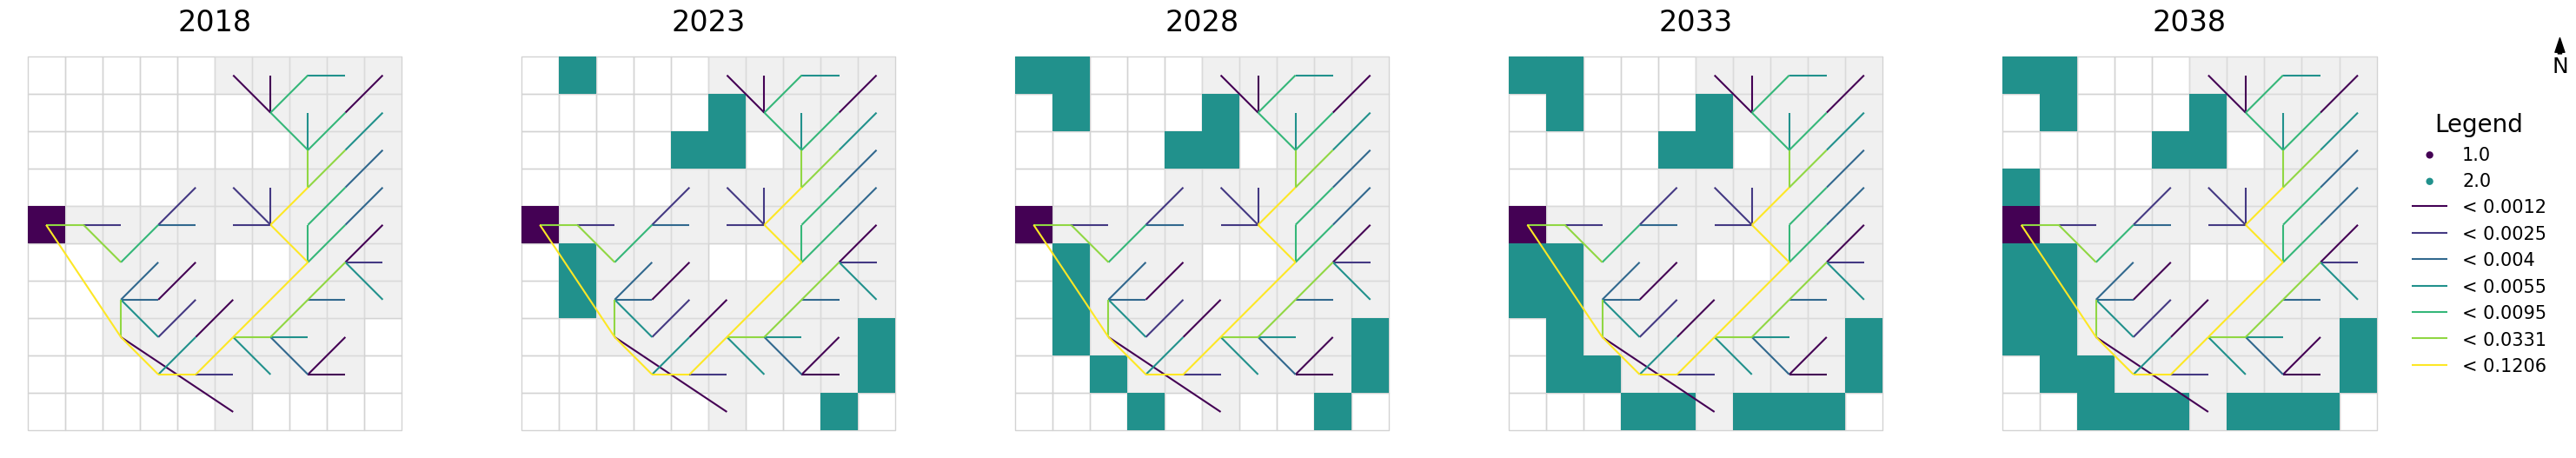

In [16]:
plot_development(poly_dict=test_blocks_dict, 
                    lineStr_dict=test_pipes_dict, 
                    feature_poly="has_wwtp", units_poly = "[delta]", cmap_poly= pl.cm.viridis,
                    feature_lineStr="desg_flow", units_lineStr = "[-]", cmap_lineStr=pl.cm.viridis,
                    module=module, connectivity=connectivity, case_study=case_study, plot=plot, 
                    backgroud_layers=["has_ww"], cmap_background_layers=[pl.cm.Greys],
                    path=output_path,
                    verbose=False,
                    )